In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
original_df = pd.read_excel("../0. Data/summarized.meta.version2.05062020.xlsx", header=[0, 1])
contain = original_df.columns.get_level_values(0).str.contains('Unnamed')

original_df.columns = [' '.join([
                            str(i).strip()
                            for i in col
                            if str(i).strip() != '' and 'Unnamed' not in str(i)
                        ]).strip()
                        for col in original_df.columns]
# results
print(original_df.columns.tolist())
print(original_df.columns)
original_df.head()

['Sample', 'Position', 'Country', 'City', 'Plant', 'Date', 'Volume of aeration tanks (m3)', 'Actual Inf rate (m3/d)', '℃ Temp.Max.SamplingDate', '℃ Temp.Avg.SamplingDate', '℃ Temp.Min.SamplingDate', '℃ Dew.Max.SamplingDate', '℃ Dew.Avg.SamplingDate', '℃ Dew.Min.SamplingDate', '℃ Humidity.Max.SamplingDate', '℃ Humidity.Min.SamplingDate', '℃ Wind.Max.SamplingDate', '℃ Wind.Min.SamplingDate', '℃ Pressure.Max.SamplingDate', '℃ Pressure.Min.SamplingDate', '℃ Precipitation.SamplingDate', '℃ Temp.Max.WeekMean', '℃ Temp.Avg.WeekMean', '℃ Temp.Min.WeekMean', '℃ Dew.Max.WeekMean', '℃ Dew.Avg.WeekMean', '℃ Dew.Min.WeekMean', '℃ Humidity.Max.WeekMean', '℃ Humidity.Min.WeekMean', '℃ Wind.Max.WeekMean', '℃ Wind.Min.WeekMean', '℃ Pressure.Max.WeekMean', '℃ Pressure.Min.WeekMean', '℃ Precipitation.WeekMean', '℃ Temp.Max.WeekMax', '℃ Temp.Avg.WeekMax', '℃ Temp.Min.WeekMax', '℃ Dew.Max.WeekMax', '℃ Dew.Avg.WeekMax', '℃ Dew.Min.WeekMax', '℃ Humidity.Max.WeekMax', '℃ Humidity.Min.WeekMax', '℃ Wind.Max.Wee

,Sample,Position,Country,City,Plant,Date,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,...,Zinc (mg/L),Lead (mg/L),Copper (mg/L),Arsenic (mg/L),Cadmium (mg/L),Sulphur (mg/L),Sillicon (mg/L),Nickel (mg/L),Chromium (mg/L),Mercury (mg/L)
0,UK01A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-01-28,3600.0,17254.0,6.67,3.33,...,0.065779,0,0.025316,0.000000,0.000289,25.6924,0.047071,0.008185,0.001866,NaN
1,UK02A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-04,3600.0,7007.0,5.56,3.33,...,0.099628,0,0.037386,0.000000,0.000435,26.1562,0.648063,0.007481,0,NaN
2,UK03A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-11,3600.0,7197.0,5.56,4.44,...,0.055098,0,0.02253,0.008732,0.000258,25.9403,0.166629,0.003642,0.002561,NaN
3,UK04A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-18,3600.0,6126.0,11.67,10.00,...,0.075384,0,0.023726,0.012102,0.000284,27.6539,0.128797,0.015556,0.001843,NaN
4,UK05A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-25,3600.0,6898.0,10.56,7.78,...,0.109344,0,0.025835,0.000000,0.00044,26.1561,0.060467,0.005775,0.001623,NaN


## Step 1: Generate "Q*"

Q_in = 'Actual inf rate' /n

Q_in_design = 'Designed Capacity' = 'Volume of aeration tanks (m3)'

Q* = Q_in / Q_in_design (%)


In [17]:
actual_influent_rate_col = 'Actual Inf rate (m3/d)'
design_capacity_col = 'Volume of aeration tanks (m3)'

# Create the new column 'Q* (%)'
original_df['Q* (%)'] = (original_df[actual_influent_rate_col] / original_df[design_capacity_col]) * 100
original_df['Q* (%)']

0       479.277778
1       194.638889
2       199.916667
3       170.166667
4       191.611111
           ...    
1246    327.364837
1247    466.998933
1248    402.760686
1249    351.587497
1250    386.413980
Name: Q* (%), Length: 1251, dtype: float64

## Step 2: Generate "COD Removal Rate"

Original: COD Removal Rate (mg/l/h) = ([COD_in] – [COD_out])/(Q_in*V_reactor)

Revised: COD Removal Rate (mg/l/h) = ([COD_in] – [COD_out])/(V_reactor/ Q_in * 24)

In [18]:
COD_in_col = 'COD (mg/l) In'
COD_out_col = 'COD (mg/l) Out'

Q_in_col = 'Actual Inf rate (m3/d)'
V_reactor_col = 'Volume of aeration tanks (m3)'

# Create the new column 
original_df['COD Removal Rate (mg/L/h)'] = (original_df[COD_in_col] - original_df[COD_out_col]) / (original_df[V_reactor_col] / original_df[Q_in_col] * 24)
original_df['COD Removal Rate (mg/L/h)']

0       24.363287
1       15.652211
2        6.164097
3        7.161181
4        7.744282
          ...    
1246    37.510554
1247    14.593717
1248    43.632408
1249    48.636270
1250    -5.635204
Name: COD Removal Rate (mg/L/h), Length: 1251, dtype: float64

## Step 3: Generate " COD Removal Efficiency (%)"

COD Removal Efficiency (%) = ([COD_in]-[COD_out])/[COD_in] * 100


In [19]:
COD_in_col = 'COD (mg/l) In'
COD_out_col = 'COD (mg/l) Out'

# Create the new column 
original_df['COD Removal Efficiency (%)'] = (original_df[COD_in_col] - original_df[COD_out_col]) / original_df[COD_in_col] * 100
original_df['COD Removal Efficiency (%)']

0        52.813853
1        63.486842
2        38.743455
3        46.759259
4        46.634615
           ...    
1246     88.709677
1247     75.000000
1248     86.666667
1249     92.222222
1250   -116.666667
Name: COD Removal Efficiency (%), Length: 1251, dtype: float64

## Step 4-1: Plot Q* vs [COD]

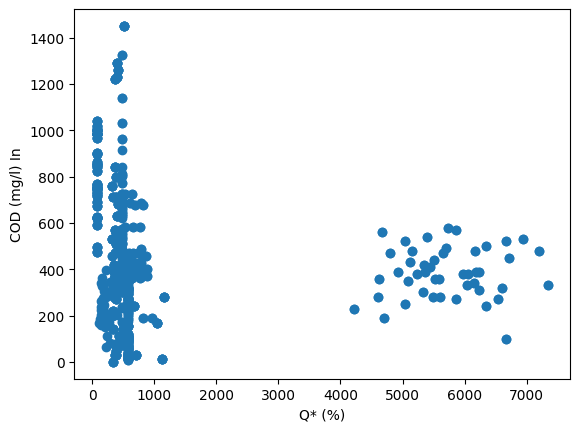

In [8]:
plt.scatter(original_df['Q* (%)'], original_df[COD_in_col])
plt.xlabel('Q* (%)')
plt.ylabel('COD (mg/l) In')
plt.show()

## Step 4-2: Plot Q* vs COD Removal Efficiency 

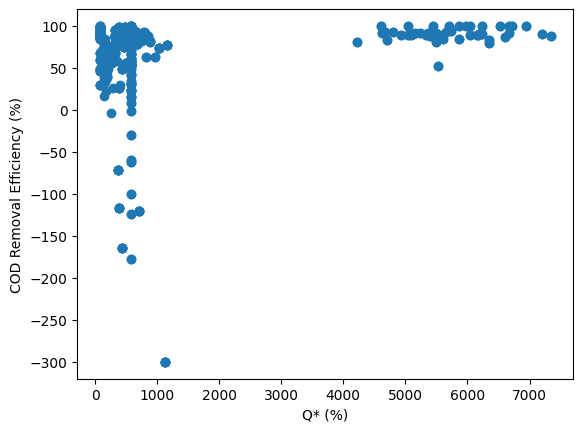

In [9]:
plt.scatter(original_df['Q* (%)'], original_df['COD Removal Efficiency (%)'])
plt.xlabel('Q* (%)')
plt.ylabel('COD Removal Efficiency (%)')
plt.show()

## Step 4-3: Plot Q* vs COD Removal Rate

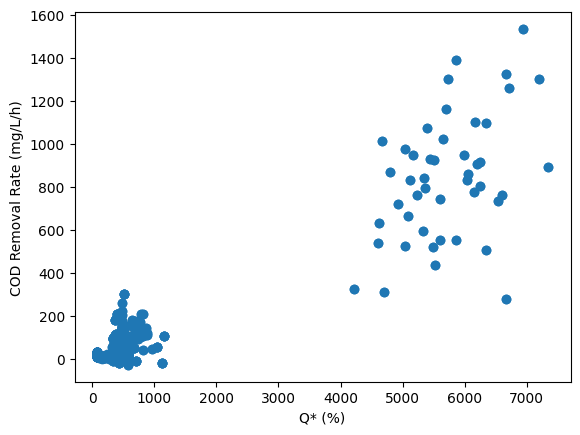

In [10]:
plt.scatter(original_df['Q* (%)'], original_df['COD Removal Rate (mg/L/h)'])
plt.xlabel('Q* (%)')
plt.ylabel('COD Removal Rate (mg/L/h)')
plt.show()

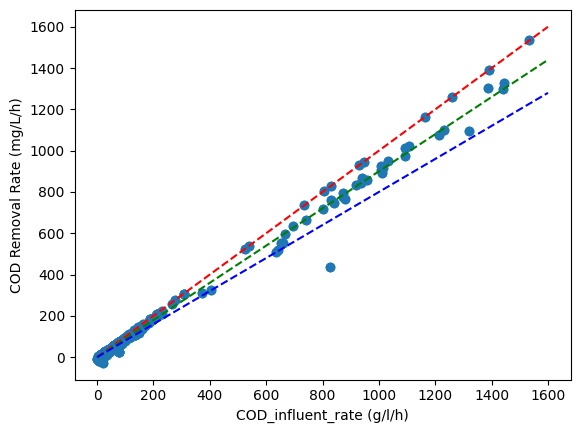

In [29]:
original_df['COD_influent_rate (g/l/h)'] =  original_df['COD (mg/l) In'] * original_df['Actual Inf rate (m3/d)'] /(original_df['Volume of aeration tanks (m3)']*24)
plt.scatter(original_df['COD_influent_rate (g/l/h)'], original_df['COD Removal Rate (mg/L/h)'])
plt.ylabel('COD Removal Rate (mg/L/h)')
plt.xlabel('COD_influent_rate (g/l/h)')

# Diagonal (예측 = 실제)
# 100 % efficiency line
min_val = 0
max_val = 1600
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')

# 90 % efficiency line
plt.plot([min_val, max_val], [min_val, max_val*0.9], 'g--', label='90% Efficiency')

# 80 % efficiency line
plt.plot([min_val, max_val], [min_val, max_val*0.8], 'b--', label='80% Efficiency')

plt.show()

In [34]:
original_df['efficiency'] = original_df['COD Removal Rate (mg/L/h)'] / original_df['COD_influent_rate (g/l/h)']
original_df['performance_class'] = original_df['efficiency'].apply(lambda x: 2 if x > 0.9 else 1 if x > 0.8 else 0)
original_df['performance_class'].value_counts()

performance_class
0    585
2    393
1    273
Name: count, dtype: int64

In [32]:
original_df.to_csv('classification_data.csv', index=False)